# ROBINHOOD CHURNED ANALYSIS

## Importing libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pprint import pprint

plt.style.use("seaborn-whitegrid")
# sns.set_style("darkgrid")
# sns.set_context("poster")

plt.rcParams["figure.figsize"] = (10, 6)

# pd.set_option('display.max_columns', 100)
# pd.set_option('display.float_format', '{:.3f}'.format)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Reading Data

In [179]:
# data2 = pd.read_csv("datasets/robin/features_data.csv")
# dff = data2.copy()
# dff

In [180]:
data1 = pd.read_csv("datasets/robin/equity_value_data.csv")
dfe = data1.copy()
dfe

,timestamp,close_equity,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
...,...,...,...
1119153,2017-08-14T00:00:00Z,2270.71,98580360c4fb5b0ec511cd87f0d429ed
1119154,2017-08-15T00:00:00Z,2275.02,98580360c4fb5b0ec511cd87f0d429ed
1119155,2017-08-16T00:00:00Z,2282.03,98580360c4fb5b0ec511cd87f0d429ed
1119156,2017-08-17T00:00:00Z,2237.45,98580360c4fb5b0ec511cd87f0d429ed


## Data Preprocessing

In [181]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119158 entries, 0 to 1119157
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   timestamp     1119158 non-null  object 
 1   close_equity  1119158 non-null  float64
 2   user_id       1119158 non-null  object 
dtypes: float64(1), object(2)
memory usage: 25.6+ MB


In [182]:
dfe.user_id.nunique()

5584

In [183]:
print(dfe.close_equity.min())
dfe.close_equity.max()

10.0


478948.41

In [184]:
dfe.timestamp = dfe.timestamp.astype("datetime64[ns]")

In [186]:
%%time

user_id = []
min_value = []
max_value = []
argmin_value = []
argmax_value = []
active_day = []
transaction_average = []

for i in dfe.user_id.unique():
    df_i = dfe[dfe.user_id == i].reset_index()     
    user_id.append(df_i.user_id.min())
    min_value.append(df_i.close_equity.min())
    max_value.append(df_i.close_equity.max())
    argmin_value.append(df_i.close_equity.argmin())
    argmax_value.append(df_i.close_equity.argmax())
    active_day.append(len(df_i.user_id))
    transaction_average.append(df_i.close_equity.mean())
      
    zzz = {"user_id":user_id , "min_value":min_value, "max_value":max_value, "argmin_value":argmin_value, "argmax_value": argmax_value,
            "active_day": active_day, "transaction_average":transaction_average}
dfe_new = pd.DataFrame(zzz) 
dfe_new

,user_id,min_value,max_value,argmin_value,argmax_value,active_day,transaction_average
0,bcef4fa9b0bdf22bcf7deae708decf03,39.690,5039.69,125,128,163,1038.424908
1,1872e03edd5a15905503cfbb8ea31545,39.280,1488.61,1,185,189,408.398242
2,e89fb1b362343157d25ca04b79ba782a,139.690,7431.93,224,16,252,3211.082133
3,03674dccb53b0431c05aa24d617ca37d,339.770,988.21,24,239,252,485.916528
4,f84fbe8c1021d1728aa2a28afc55a5c2,173.690,28592.09,227,164,252,8772.291833
...,...,...,...,...,...,...,...
5579,e345dcb8c9b9515792e2e11bf1152ad5,440.700,2584.30,0,102,104,1453.947548
5580,5df6f3c386056d032ddb59e2d5a9adbb,14.100,271.04,3,117,143,161.470105
5581,d5d50d3c966db18d9cc02be6b8fbf18a,74.830,188.60,52,240,251,100.537221
5582,b68798cb2c64254d01481347d70f0290,14.050,608.08,1,112,132,376.691061


In [195]:
%%time

dfe["timestamp2"] = ""
dfe["day_difference"] = ""

churned_user_id = []
churned_day = []
churned_size = []
churned_close_equity = []

for i in dfe.user_id.unique():
        df_i = dfe[dfe.user_id == i].reset_index()
        k = 0
        for i in range(1, len(df_i.user_id)):  
                df_i["timestamp2"][i-1] = df_i.timestamp[i]
                df_i["day_difference"][i-1] = abs((df_i.timestamp2[i-1]-df_i.timestamp[i-1]).days)
        
                if df_i["day_difference"][i-1] >= 28:
                        k += 1                      
                        churned_user_id.append(df_i.user_id[i-1])
                        churned_day.append(df_i["day_difference"][i-1])
                        churned_size.append(k)
                        churned_close_equity.append(df_i.close_equity[i-1])
                        
                        print(df_i.user_id[i-1], df_i["day_difference"][i-1], k, df_i.close_equity[i-1])
        

chrn = {"churned_user_id":churned_user_id, "churned_day":churned_day, "churned_size":churned_size, 
        "churned_close_equity":churned_close_equity}
df_churned = pd.DataFrame(chrn) 
df_churned


270cda53a026bcf6c2b98492b23c1b99 73 1 12499.25
319c069e77187c7e7e7c027eb00fd941 126 1 193.0
ec84f134c5b27c4f5702803e98eb3f40 36 1 57.68
6dbedf7f2972b4f6ea60a15d48cb292c 60 1 853.16
91837d41270b81b267fc205c3e03ee9b 42 1 88.71
91837d41270b81b267fc205c3e03ee9b 49 2 21.06
edec0a3b99769034728d37f4576a7ce9 76 1 10.33
afb70789163c1e970a3a450046240abd 94 1 585.36
c162193a2274e87e36dddbc368e19be2 160 1 2370.0
42d770c7fd58e1a3c93ff190cab9cbdc 47 1 100.0
d115f8b128f31c22670270585158f39b 165 1 500.0
39c830063e36256f3759d48e962305f7 113 1 10.23
39c830063e36256f3759d48e962305f7 36 2 10.41
2c7c1bd119f2aaf6728b1523b7b4837d 83 1 4271.81
2c7c1bd119f2aaf6728b1523b7b4837d 61 2 10000.05
1a8d66727332fb16f70b0c125b462200 114 1 228.87
ff7610fdd7ac5cbfa0b17aca53af5db4 172 1 17.17
dd229a74b6a3477075139c8799a98c2c 106 1 500.0
50b846ab40078ae27b0bf7d6004c9a28 49 1 27.41
50b846ab40078ae27b0bf7d6004c9a28 36 2 10.01
50b846ab40078ae27b0bf7d6004c9a28 48 3 32.98
7082ace269763c03e16a2adda1c3d540 64 1 1074.83
581bea785cd

,churned_user_id,churned_day,churned_size,churned_close_equity
0,270cda53a026bcf6c2b98492b23c1b99,73,1,12499.25
1,319c069e77187c7e7e7c027eb00fd941,126,1,193.00
2,ec84f134c5b27c4f5702803e98eb3f40,36,1,57.68
3,6dbedf7f2972b4f6ea60a15d48cb292c,60,1,853.16
4,91837d41270b81b267fc205c3e03ee9b,42,1,88.71
...,...,...,...,...
319,28099dd28b095346298166c41b5981c1,29,1,1000.00
320,28099dd28b095346298166c41b5981c1,91,2,31.38
321,b68798cb2c64254d01481347d70f0290,42,1,310.43
322,b68798cb2c64254d01481347d70f0290,46,2,322.78


In [198]:
# %%time

# churned_user_id = []
# churned_day = []
# churned_size = []
# churned_close_equity= []

# for i in dfe.user_id.unique():
#     df_i = dfe[dfe.user_id == i].reset_index()
#     k = 0 
#     for j in range(1, len(df_i.user_id)):  
#         day = (df_i.timestamp[j]-df_i.timestamp[j-1]).days
#         # print(j, day)
#         if day >= 28:
#             k += 1
#             churned_user_id.append(df_i.user_id[j-1])
#             churned_day.append(day)
#             churned_size.append(k)
#             churned_close_equity.append(df_i.close_equity[j-1])
#             print(df_i.user_id[j-1], day, k, df_i.close_equity[j-1])
    
# # df_churned = pd.concat([s1, s2, s3, s4], columns=['churned_user_id', 'churned_day', "churned_size", "churned_close_equity"])
# # df_churned     
# chrn = {"churned_user_id":churned_user_id, "churned_day":churned_day, "churned_size":churned_size, "churned_close_equity":churned_close_equity}
# df_churned = pd.DataFrame(chrn) 
# df_churned
            

In [200]:
df_churned

,churned_user_id,churned_day,churned_size,churned_close_equity
0,270cda53a026bcf6c2b98492b23c1b99,73,1,12499.25
1,319c069e77187c7e7e7c027eb00fd941,126,1,193.00
2,ec84f134c5b27c4f5702803e98eb3f40,36,1,57.68
3,6dbedf7f2972b4f6ea60a15d48cb292c,60,1,853.16
4,91837d41270b81b267fc205c3e03ee9b,42,1,88.71
...,...,...,...,...
319,28099dd28b095346298166c41b5981c1,29,1,1000.00
320,28099dd28b095346298166c41b5981c1,91,2,31.38
321,b68798cb2c64254d01481347d70f0290,42,1,310.43
322,b68798cb2c64254d01481347d70f0290,46,2,322.78


In [201]:
df_churned.churned_size.value_counts()

1    279
2     42
3      3
Name: churned_size, dtype: int64

In [202]:
churned_dfe = df_churned[df_churned.churned_size == 1]
churned_dfe

,churned_user_id,churned_day,churned_size,churned_close_equity
0,270cda53a026bcf6c2b98492b23c1b99,73,1,12499.25
1,319c069e77187c7e7e7c027eb00fd941,126,1,193.00
2,ec84f134c5b27c4f5702803e98eb3f40,36,1,57.68
3,6dbedf7f2972b4f6ea60a15d48cb292c,60,1,853.16
4,91837d41270b81b267fc205c3e03ee9b,42,1,88.71
...,...,...,...,...
317,6d8a13ee1df0f2bbd72448626155adc1,87,1,501.15
318,3d3287d57b29b6eb6e5ad3b4cb6df116,123,1,58.32
319,28099dd28b095346298166c41b5981c1,29,1,1000.00
321,b68798cb2c64254d01481347d70f0290,42,1,310.43


In [203]:
churned_dfe.rename(columns ={'churned_user_id':'user_id'},inplace=True)
churned_dfe

,user_id,churned_day,churned_size,churned_close_equity
0,270cda53a026bcf6c2b98492b23c1b99,73,1,12499.25
1,319c069e77187c7e7e7c027eb00fd941,126,1,193.00
2,ec84f134c5b27c4f5702803e98eb3f40,36,1,57.68
3,6dbedf7f2972b4f6ea60a15d48cb292c,60,1,853.16
4,91837d41270b81b267fc205c3e03ee9b,42,1,88.71
...,...,...,...,...
317,6d8a13ee1df0f2bbd72448626155adc1,87,1,501.15
318,3d3287d57b29b6eb6e5ad3b4cb6df116,123,1,58.32
319,28099dd28b095346298166c41b5981c1,29,1,1000.00
321,b68798cb2c64254d01481347d70f0290,42,1,310.43


In [204]:
data2 = pd.read_csv("datasets/robin/features_data.csv")
dff = data2.copy()
dff

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91
...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.339283,stock,300.0,long_time_horizon,03880c726d8a4e5db006afe4119ad974
5580,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,7.241383,stock,100.0,short_time_horizon,ae8315109657f44852b24c6bca4decd6
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,both,22.967167,stock,50.0,short_time_horizon,f29c174989f9737058fe808fcf264135
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,10.338417,stock,100.0,long_time_horizon,24843497d1de88b2e7233f694436cb3a


In [205]:
dfe_new

,user_id,min_value,max_value,argmin_value,argmax_value,active_day,transaction_average
0,bcef4fa9b0bdf22bcf7deae708decf03,39.690,5039.69,125,128,163,1038.424908
1,1872e03edd5a15905503cfbb8ea31545,39.280,1488.61,1,185,189,408.398242
2,e89fb1b362343157d25ca04b79ba782a,139.690,7431.93,224,16,252,3211.082133
3,03674dccb53b0431c05aa24d617ca37d,339.770,988.21,24,239,252,485.916528
4,f84fbe8c1021d1728aa2a28afc55a5c2,173.690,28592.09,227,164,252,8772.291833
...,...,...,...,...,...,...,...
5579,e345dcb8c9b9515792e2e11bf1152ad5,440.700,2584.30,0,102,104,1453.947548
5580,5df6f3c386056d032ddb59e2d5a9adbb,14.100,271.04,3,117,143,161.470105
5581,d5d50d3c966db18d9cc02be6b8fbf18a,74.830,188.60,52,240,251,100.537221
5582,b68798cb2c64254d01481347d70f0290,14.050,608.08,1,112,132,376.691061


In [211]:
data_ = pd.merge(dfe_new, dff, on="user_id", how="right")
data_

,user_id,min_value,max_value,argmin_value,argmax_value,active_day,transaction_average,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon
0,bcef4fa9b0bdf22bcf7deae708decf03,39.690,5039.69,125,128,163,1038.424908,med_risk_tolerance,good_investment_exp,very_important_liq_need,Android,15.481217,etp,1.0,short_time_horizon
1,1872e03edd5a15905503cfbb8ea31545,39.280,1488.61,1,185,189,408.398242,high_risk_tolerance,no_investment_exp,very_important_liq_need,both,271.400700,stock,200.0,short_time_horizon
2,e89fb1b362343157d25ca04b79ba782a,139.690,7431.93,224,16,252,3211.082133,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,both,42.657067,stock,1.0,med_time_horizon
3,03674dccb53b0431c05aa24d617ca37d,339.770,988.21,24,239,252,485.916528,med_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,11.027950,stock,100.0,short_time_horizon
4,f84fbe8c1021d1728aa2a28afc55a5c2,173.690,28592.09,227,164,252,8772.291833,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,0.000000,stock,500.0,short_time_horizon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579,e345dcb8c9b9515792e2e11bf1152ad5,440.700,2584.30,0,102,104,1453.947548,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,99.722300,stock,448.5,short_time_horizon
5580,5df6f3c386056d032ddb59e2d5a9adbb,14.100,271.04,3,117,143,161.470105,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,27.284733,stock,1.0,short_time_horizon
5581,d5d50d3c966db18d9cc02be6b8fbf18a,74.830,188.60,52,240,251,100.537221,high_risk_tolerance,no_investment_exp,very_important_liq_need,Android,7.189850,stock,70.0,long_time_horizon
5582,b68798cb2c64254d01481347d70f0290,14.050,608.08,1,112,132,376.691061,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,3.293450,stock,300.0,short_time_horizon


In [212]:
data = pd.merge(churned_dfe, data_, on="user_id", how="right")
data

,user_id,churned_day,churned_size,churned_close_equity,min_value,max_value,argmin_value,argmax_value,active_day,transaction_average,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon
0,bcef4fa9b0bdf22bcf7deae708decf03,NaN,NaN,NaN,39.690,5039.69,125,128,163,1038.424908,med_risk_tolerance,good_investment_exp,very_important_liq_need,Android,15.481217,etp,1.0,short_time_horizon
1,1872e03edd5a15905503cfbb8ea31545,NaN,NaN,NaN,39.280,1488.61,1,185,189,408.398242,high_risk_tolerance,no_investment_exp,very_important_liq_need,both,271.400700,stock,200.0,short_time_horizon
2,e89fb1b362343157d25ca04b79ba782a,NaN,NaN,NaN,139.690,7431.93,224,16,252,3211.082133,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,both,42.657067,stock,1.0,med_time_horizon
3,03674dccb53b0431c05aa24d617ca37d,NaN,NaN,NaN,339.770,988.21,24,239,252,485.916528,med_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,11.027950,stock,100.0,short_time_horizon
4,f84fbe8c1021d1728aa2a28afc55a5c2,NaN,NaN,NaN,173.690,28592.09,227,164,252,8772.291833,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,0.000000,stock,500.0,short_time_horizon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579,e345dcb8c9b9515792e2e11bf1152ad5,NaN,NaN,NaN,440.700,2584.30,0,102,104,1453.947548,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,99.722300,stock,448.5,short_time_horizon
5580,5df6f3c386056d032ddb59e2d5a9adbb,NaN,NaN,NaN,14.100,271.04,3,117,143,161.470105,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,27.284733,stock,1.0,short_time_horizon
5581,d5d50d3c966db18d9cc02be6b8fbf18a,NaN,NaN,NaN,74.830,188.60,52,240,251,100.537221,high_risk_tolerance,no_investment_exp,very_important_liq_need,Android,7.189850,stock,70.0,long_time_horizon
5582,b68798cb2c64254d01481347d70f0290,42.0,1.0,310.43,14.050,608.08,1,112,132,376.691061,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,3.293450,stock,300.0,short_time_horizon


In [213]:
data.fillna(0, inplace=True)
data

,user_id,churned_day,churned_size,churned_close_equity,min_value,max_value,argmin_value,argmax_value,active_day,transaction_average,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon
0,bcef4fa9b0bdf22bcf7deae708decf03,0.0,0.0,0.00,39.690,5039.69,125,128,163,1038.424908,med_risk_tolerance,good_investment_exp,very_important_liq_need,Android,15.481217,etp,1.0,short_time_horizon
1,1872e03edd5a15905503cfbb8ea31545,0.0,0.0,0.00,39.280,1488.61,1,185,189,408.398242,high_risk_tolerance,no_investment_exp,very_important_liq_need,both,271.400700,stock,200.0,short_time_horizon
2,e89fb1b362343157d25ca04b79ba782a,0.0,0.0,0.00,139.690,7431.93,224,16,252,3211.082133,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,both,42.657067,stock,1.0,med_time_horizon
3,03674dccb53b0431c05aa24d617ca37d,0.0,0.0,0.00,339.770,988.21,24,239,252,485.916528,med_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,11.027950,stock,100.0,short_time_horizon
4,f84fbe8c1021d1728aa2a28afc55a5c2,0.0,0.0,0.00,173.690,28592.09,227,164,252,8772.291833,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,0.000000,stock,500.0,short_time_horizon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579,e345dcb8c9b9515792e2e11bf1152ad5,0.0,0.0,0.00,440.700,2584.30,0,102,104,1453.947548,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,99.722300,stock,448.5,short_time_horizon
5580,5df6f3c386056d032ddb59e2d5a9adbb,0.0,0.0,0.00,14.100,271.04,3,117,143,161.470105,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,27.284733,stock,1.0,short_time_horizon
5581,d5d50d3c966db18d9cc02be6b8fbf18a,0.0,0.0,0.00,74.830,188.60,52,240,251,100.537221,high_risk_tolerance,no_investment_exp,very_important_liq_need,Android,7.189850,stock,70.0,long_time_horizon
5582,b68798cb2c64254d01481347d70f0290,42.0,1.0,310.43,14.050,608.08,1,112,132,376.691061,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,3.293450,stock,300.0,short_time_horizon


In [214]:
data["churned_size"] = data.churned_size.astype("int64")
data["churned_day"] = data.churned_day.astype("int64")
data.rename(columns ={'churned_size':'churned'},inplace=True)
data

,user_id,churned_day,churned,churned_close_equity,min_value,max_value,argmin_value,argmax_value,active_day,transaction_average,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon
0,bcef4fa9b0bdf22bcf7deae708decf03,0,0,0.00,39.690,5039.69,125,128,163,1038.424908,med_risk_tolerance,good_investment_exp,very_important_liq_need,Android,15.481217,etp,1.0,short_time_horizon
1,1872e03edd5a15905503cfbb8ea31545,0,0,0.00,39.280,1488.61,1,185,189,408.398242,high_risk_tolerance,no_investment_exp,very_important_liq_need,both,271.400700,stock,200.0,short_time_horizon
2,e89fb1b362343157d25ca04b79ba782a,0,0,0.00,139.690,7431.93,224,16,252,3211.082133,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,both,42.657067,stock,1.0,med_time_horizon
3,03674dccb53b0431c05aa24d617ca37d,0,0,0.00,339.770,988.21,24,239,252,485.916528,med_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,11.027950,stock,100.0,short_time_horizon
4,f84fbe8c1021d1728aa2a28afc55a5c2,0,0,0.00,173.690,28592.09,227,164,252,8772.291833,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,0.000000,stock,500.0,short_time_horizon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579,e345dcb8c9b9515792e2e11bf1152ad5,0,0,0.00,440.700,2584.30,0,102,104,1453.947548,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,99.722300,stock,448.5,short_time_horizon
5580,5df6f3c386056d032ddb59e2d5a9adbb,0,0,0.00,14.100,271.04,3,117,143,161.470105,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,27.284733,stock,1.0,short_time_horizon
5581,d5d50d3c966db18d9cc02be6b8fbf18a,0,0,0.00,74.830,188.60,52,240,251,100.537221,high_risk_tolerance,no_investment_exp,very_important_liq_need,Android,7.189850,stock,70.0,long_time_horizon
5582,b68798cb2c64254d01481347d70f0290,42,1,310.43,14.050,608.08,1,112,132,376.691061,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,3.293450,stock,300.0,short_time_horizon


In [215]:
data.risk_tolerance.value_counts()

high_risk_tolerance    3566
med_risk_tolerance     1779
low_risk_tolerance      239
Name: risk_tolerance, dtype: int64

In [216]:
data.investment_experience.value_counts()

limited_investment_exp      2578
no_investment_exp           1796
good_investment_exp         1134
extensive_investment_exp      76
Name: investment_experience, dtype: int64

In [217]:
data.liquidity_needs.value_counts()

very_important_liq_need        4217
somewhat_important_liq_need    1109
not_important_liq_need          258
Name: liquidity_needs, dtype: int64

In [218]:
data.platform.value_counts()

iOS        3550
Android    1529
both        505
Name: platform, dtype: int64

In [219]:
data.instrument_type_first_traded.value_counts()

stock       4827
etp          383
adr          197
reit          55
mlp           55
cef           20
wrt           16
0             13
rlt            9
lp             8
tracking       1
Name: instrument_type_first_traded, dtype: int64

In [220]:
data.time_horizon.value_counts()

short_time_horizon    2833
long_time_horizon     1833
med_time_horizon       918
Name: time_horizon, dtype: int64

## Handling Imbalance Data

In [221]:
data.churned.value_counts()

0    5305
1     279
Name: churned, dtype: int64

0    5305
1     279
Name: churned, dtype: int64


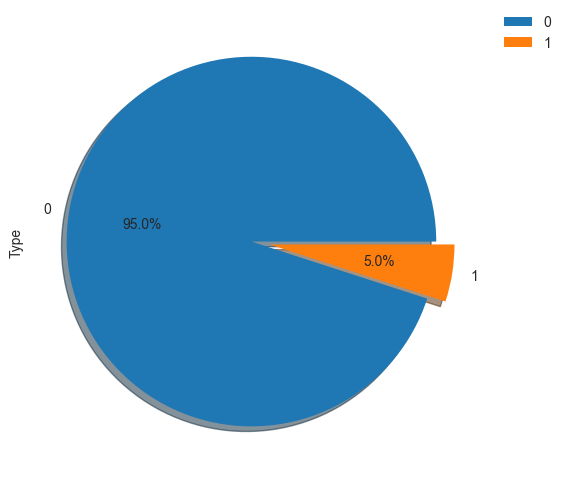

In [222]:
print(data.churned.value_counts())

ax = data.groupby('churned').size().plot(kind='pie',
                                       y = "churned",
                                       label = "Type",
                                       autopct='%1.1f%%',
                                       
                                       shadow=True, 
                                       explode=[0.05, 0.05]
                                       )
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [223]:
unchurned_majority = data[data["churned"] == 0]
churned_minority  = data[data["churned"] == 1]
print(unchurned_majority.shape)
print(churned_minority.shape)

(5305, 18)
(279, 18)


### Downsampling

In [224]:
from sklearn.utils import resample
unchurned_downsample = resample(unchurned_majority,
             replace=True,
             n_samples=len(churned_minority),
             random_state=42)

print(unchurned_downsample.shape)

(279, 18)


0    279
1    279
Name: churned, dtype: int64


<AxesSubplot: ylabel='Type'>

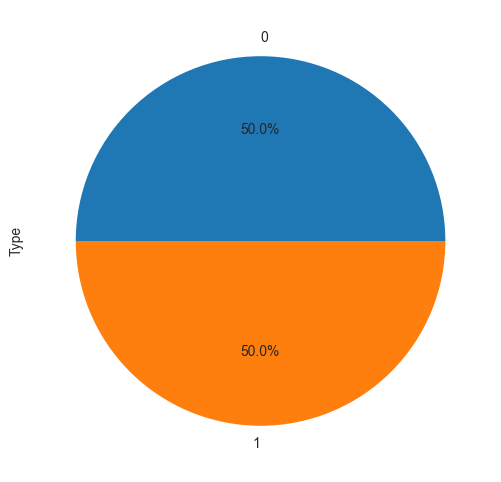

In [225]:
data_downsampled = pd.concat([unchurned_downsample, churned_minority])

print(data_downsampled["churned"].value_counts())

data_downsampled.groupby('churned').size().plot(kind='pie',
                                       y = "churned",
                                       label = "Type",
                                       autopct='%1.1f%%')

### Upsampling

In [226]:
from sklearn.utils import resample
churned_upsample = resample(churned_minority,
             replace=True,
             n_samples=len(unchurned_majority),
             random_state=42)

print(churned_upsample.shape)

(5305, 18)


0    5305
1    5305
Name: churned, dtype: int64


<AxesSubplot: ylabel='Type'>

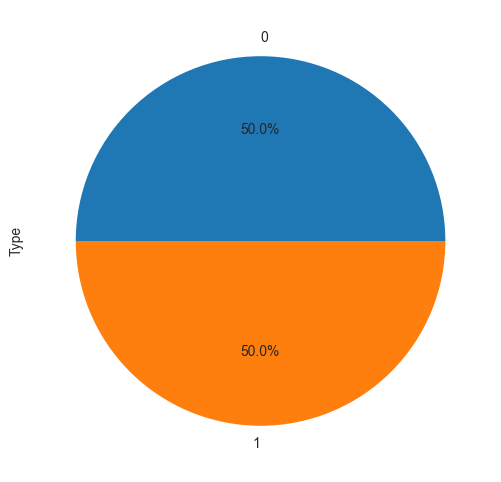

In [227]:
data_upsampled = pd.concat([unchurned_majority, churned_upsample])

print(data_upsampled["churned"].value_counts())

data_upsampled.groupby('churned').size().plot(kind='pie',
                                       y = "churned",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [228]:
print("data_upsampled-shape:", data_upsampled.shape)
print("data_downsampled-shape:", data_downsampled.shape)

data_upsampled-shape: (10610, 18)
data_downsampled-shape: (558, 18)


In [234]:
# df = data_upsampled
df = data_downsampled

df

,user_id,churned_day,churned,churned_close_equity,min_value,max_value,argmin_value,argmax_value,active_day,transaction_average,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon
902,a0edcc55a7acca9869a5ce1aa737893d,0,0,0.00,26.8700,40.730,55,229,252,31.591964,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,0.000000,adr,500.0,long_time_horizon
5495,d6f110edb78ccbaa8d92b8080a861e30,0,0,0.00,194.5800,594.435,40,222,232,282.821272,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,31.661917,stock,200.0,short_time_horizon
5459,e7fe6743ceb9d81102b1160a05ea2f37,0,0,0.00,1299.1300,4490.270,2,233,251,2933.321886,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,0.000000,stock,1000.0,med_time_horizon
3964,81a87461e38dd0c0c05fb9193e01a79c,0,0,0.00,285.6300,314.880,157,38,158,300.228418,high_risk_tolerance,no_investment_exp,very_important_liq_need,Android,4.695350,stock,100.0,long_time_horizon
3238,2f6205c0d9b5a5644f88f4fc0df421c2,0,0,0.00,199.3400,409.970,6,216,240,337.818375,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,68.458900,stock,200.0,short_time_horizon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,6d8a13ee1df0f2bbd72448626155adc1,87,1,501.15,48.2724,520.310,41,18,86,279.414534,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,12.254983,stock,200.0,med_time_horizon
5551,3d3287d57b29b6eb6e5ad3b4cb6df116,123,1,58.32,45.9801,1117.280,0,77,160,458.505236,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,3.326217,adr,50.0,med_time_horizon
5568,28099dd28b095346298166c41b5981c1,29,1,1000.00,25.7600,33920.530,95,64,101,14835.258432,med_risk_tolerance,no_investment_exp,very_important_liq_need,both,13.952400,etp,500.0,med_time_horizon
5582,b68798cb2c64254d01481347d70f0290,42,1,310.43,14.0500,608.080,1,112,132,376.691061,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,3.293450,stock,300.0,short_time_horizon


In [235]:
df = df.drop(["user_id", "churned_day", "churned_day", "churned_close_equity", "argmin_value", "argmax_value"], axis = 1).reset_index(drop=True)
df

,churned,min_value,max_value,active_day,transaction_average,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon
0,0,26.8700,40.730,252,31.591964,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,0.000000,adr,500.0,long_time_horizon
1,0,194.5800,594.435,232,282.821272,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,31.661917,stock,200.0,short_time_horizon
2,0,1299.1300,4490.270,251,2933.321886,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,0.000000,stock,1000.0,med_time_horizon
3,0,285.6300,314.880,158,300.228418,high_risk_tolerance,no_investment_exp,very_important_liq_need,Android,4.695350,stock,100.0,long_time_horizon
4,0,199.3400,409.970,240,337.818375,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,68.458900,stock,200.0,short_time_horizon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,1,48.2724,520.310,86,279.414534,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,12.254983,stock,200.0,med_time_horizon
554,1,45.9801,1117.280,160,458.505236,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,3.326217,adr,50.0,med_time_horizon
555,1,25.7600,33920.530,101,14835.258432,med_risk_tolerance,no_investment_exp,very_important_liq_need,both,13.952400,etp,500.0,med_time_horizon
556,1,14.0500,608.080,132,376.691061,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,3.293450,stock,300.0,short_time_horizon


In [237]:
# df.to_csv("df.csv")

In [238]:
# df = pd.read_csv("df.csv")
# df = df.iloc[:,1:]
# df

## Determine Dependent and Independent Variables

In [302]:
X = df.drop(labels = "churned", axis= 1)
y = df["churned"]

## Train - Test split

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify=y)

print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (446, 12)
X_test : (112, 12)
y_train : (446,)
y_test : (112,)


## Encoding and Scaling 

In [305]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

In [306]:
numerical_column = X.select_dtypes(include=['int64', 'float64']).columns
categorical_column = X.select_dtypes(include=['object', 'bool']).columns

In [307]:
col_transformer = make_column_transformer(
                        (MinMaxScaler(), numerical_column),
                        (OneHotEncoder(handle_unknown="ignore"), categorical_column),
                         remainder='passthrough')

# col_transformer = make_column_transformer(
#         (OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_column),
#         remainder=StandardScaler())

X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [310]:
col_transformer.get_feature_names_out()

array(['minmaxscaler__min_value', 'minmaxscaler__max_value',
       'minmaxscaler__active_day', 'minmaxscaler__transaction_average',
       'minmaxscaler__time_spent', 'minmaxscaler__first_deposit_amount',
       'onehotencoder__risk_tolerance_high_risk_tolerance',
       'onehotencoder__risk_tolerance_low_risk_tolerance',
       'onehotencoder__risk_tolerance_med_risk_tolerance',
       'onehotencoder__investment_experience_extensive_investment_exp',
       'onehotencoder__investment_experience_good_investment_exp',
       'onehotencoder__investment_experience_limited_investment_exp',
       'onehotencoder__investment_experience_no_investment_exp',
       'onehotencoder__liquidity_needs_not_important_liq_need',
       'onehotencoder__liquidity_needs_somewhat_important_liq_need',
       'onehotencoder__liquidity_needs_very_important_liq_need',
       'onehotencoder__platform_Android', 'onehotencoder__platform_both',
       'onehotencoder__platform_iOS',
       'onehotencoder__instrumen

In [311]:
col_transformer_df = pd.DataFrame(X_train, columns=col_transformer.get_feature_names_out())
col_transformer_df

,minmaxscaler__min_value,minmaxscaler__max_value,minmaxscaler__active_day,minmaxscaler__transaction_average,minmaxscaler__time_spent,minmaxscaler__first_deposit_amount,onehotencoder__risk_tolerance_high_risk_tolerance,onehotencoder__risk_tolerance_low_risk_tolerance,onehotencoder__risk_tolerance_med_risk_tolerance,onehotencoder__investment_experience_extensive_investment_exp,...,onehotencoder__instrument_type_first_traded_cef,onehotencoder__instrument_type_first_traded_etp,onehotencoder__instrument_type_first_traded_lp,onehotencoder__instrument_type_first_traded_mlp,onehotencoder__instrument_type_first_traded_reit,onehotencoder__instrument_type_first_traded_stock,onehotencoder__instrument_type_first_traded_wrt,onehotencoder__time_horizon_long_time_horizon,onehotencoder__time_horizon_med_time_horizon,onehotencoder__time_horizon_short_time_horizon
0,4.601727e-06,0.000164,0.188755,0.000061,0.024533,0.01600,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,8.657234e-05,0.000083,1.000000,0.000082,0.080352,0.00200,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,6.905584e-04,0.001472,0.919679,0.000851,0.051839,0.00800,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,7.591728e-05,0.004706,0.590361,0.003361,0.060416,0.00200,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.641881e-03,0.007233,0.152610,0.005395,0.003717,0.05000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1.122373e-07,0.000041,0.823293,0.000019,0.023035,0.00020,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
442,3.177811e-04,0.000765,1.000000,0.000578,0.041991,0.00400,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
443,8.700520e-03,0.016132,1.000000,0.011989,0.006417,0.00600,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
444,6.360111e-06,0.010661,0.690763,0.004126,0.011399,0.01064,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Modeling

In [312]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, RocCurveDisplay  
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate

## Ada Boosting

### Model Fitting 

In [313]:
from sklearn.ensemble import AdaBoostClassifier

In [314]:
model = AdaBoostClassifier(n_estimators= 1, random_state= 42)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1, random_state=42)

In [315]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [316]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [1.00000000e+00, 2.22044605e-16],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [1.00000000e+00, 2.22044605e-16],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.80645161e-01, 7.19354839e-01],
       [2.806451

In [317]:
pd.DataFrame(y_pred_proba).sample(10)

,0,1
40,0.280645,7.193548e-01
5,0.280645,7.193548e-01
73,1.000000,2.220446e-16
50,0.280645,7.193548e-01
74,0.280645,7.193548e-01
31,0.280645,7.193548e-01
95,0.280645,7.193548e-01
52,0.280645,7.193548e-01
61,1.000000,2.220446e-16
82,0.280645,7.193548e-01


In [318]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Pred_proba": y_pred_proba[:,1]}

pd.DataFrame.from_dict(my_dict).sample(20)

,Actual,Pred,Pred_proba
54,0,1,7.193548e-01
83,0,0,2.220446e-16
257,0,0,2.220446e-16
50,0,0,2.220446e-16
431,1,1,7.193548e-01
189,0,1,7.193548e-01
402,1,1,7.193548e-01
308,1,1,7.193548e-01
207,0,0,2.220446e-16
228,0,0,2.220446e-16


In [319]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        56
           1       0.69      1.00      0.82        56

    accuracy                           0.78       112
   macro avg       0.85      0.78      0.77       112
weighted avg       0.85      0.78      0.77       112



### Grid Search

In [335]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = AdaBoostClassifier(random_state= 42)

param_grid = {"n_estimators": [12, 20, 37, 100, 150, 500], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

# ada_grid_model = GridSearchCV(model, param_grid, scoring= "f1", cv= 10)
ada_grid_model = RandomizedSearchCV(model, param_grid, scoring= "f1", cv= 10)

In [336]:
%%time

ada_grid_model.fit(X_train, y_train)

CPU times: total: 26.3 s
Wall time: 26.7 s


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.5,
                                                          1.0],
                                        'n_estimators': [12, 20, 37, 100, 150,
                                                         500]},
                   scoring='f1')

In [337]:
print ('The Best score:', ada_grid_model.best_score_)
print("The Best Paremeters: " + str(ada_grid_model.best_params_))

ada_grid_model.best_estimator_

The Best score: 0.8388184558249565
The Best Paremeters: {'n_estimators': 20, 'learning_rate': 0.1}


AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=42)

### Final Model

In [338]:
model = ada_grid_model.best_estimator_
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=42)

In [339]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [340]:
ada_accuracy = accuracy_score(y_test, y_pred)
ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33 23]
 [ 1 55]]
              precision    recall  f1-score   support

           0       0.97      0.59      0.73        56
           1       0.71      0.98      0.82        56

    accuracy                           0.79       112
   macro avg       0.84      0.79      0.78       112
weighted avg       0.84      0.79      0.78       112



### Cross Validate

In [341]:
# model = AdaBoostClassifier(n_estimators= 12, learning_rate= 0.5, random_state= 42)
model = ada_grid_model.best_estimator_

scores = cross_validate(model, X_train, y_train, scoring= ["accuracy", "precision", "recall",
                                                              "f1", "roc_auc"], cv= 10)

df_scores = pd.DataFrame(scores, index= range(1,11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.065023,0.017005,0.800000,0.718750,1.000000,0.836364,0.880435
2,0.067000,0.013001,0.822222,0.741935,1.000000,0.851852,0.919960
3,0.045005,0.011999,0.866667,0.793103,1.000000,0.884615,0.918972
4,0.043006,0.012998,0.733333,0.656250,0.954545,0.777778,0.836957
5,0.056007,0.018999,0.733333,0.647059,1.000000,0.785714,0.815217
6,0.053006,0.012001,0.777778,0.687500,1.000000,0.814815,0.877470
7,0.042003,0.012003,0.795455,0.709677,1.000000,0.830189,0.751033
8,0.046001,0.012000,0.818182,0.733333,1.000000,0.846154,0.916322
9,0.048003,0.012002,0.840909,0.758621,1.000000,0.862745,0.931818
10,0.044004,0.014003,0.886364,0.814815,1.000000,0.897959,0.960744


In [342]:
df_scores.mean()[2:]

test_accuracy     0.807424
test_precision    0.726104
test_recall       0.995455
test_f1           0.838818
test_roc_auc      0.880893
dtype: float64

### Error Metrics

In [343]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73        56
           1       0.71      0.98      0.82        56

    accuracy                           0.79       112
   macro avg       0.84      0.79      0.78       112
weighted avg       0.84      0.79      0.78       112



[[33 23]
 [ 1 55]]


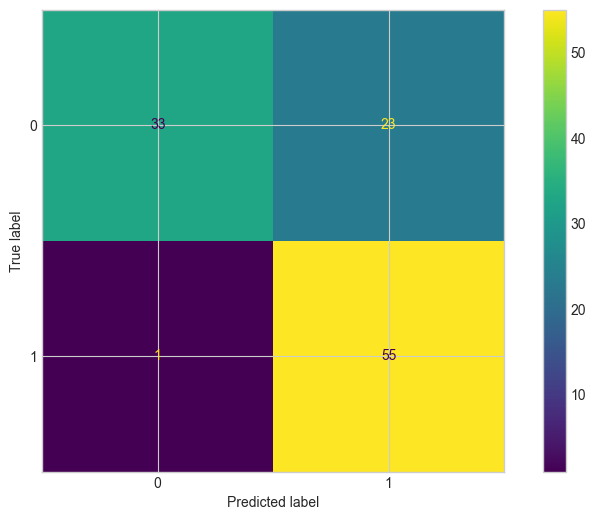

In [344]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                    display_labels=model.classes_).plot()

In [345]:
ada_scores = {
    "ada_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred)
        }, 

    "ada_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred)
        }
               }

ada = round(pd.DataFrame(ada_scores),2)
ada

,ada_train,ada_test
accuracy,0.81,0.79
f1_score,0.84,0.82
precision,0.72,0.71
recall,1.00,0.98


### Evaluating ROC Curves and AUC

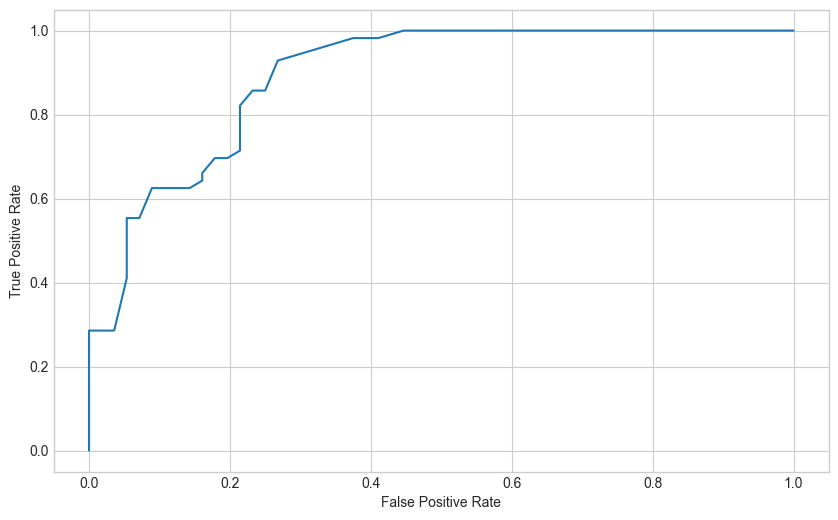

In [354]:
# roc_curve(ada_grid_model, X_test, y_test);

y_score = ada_grid_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=ada_grid_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

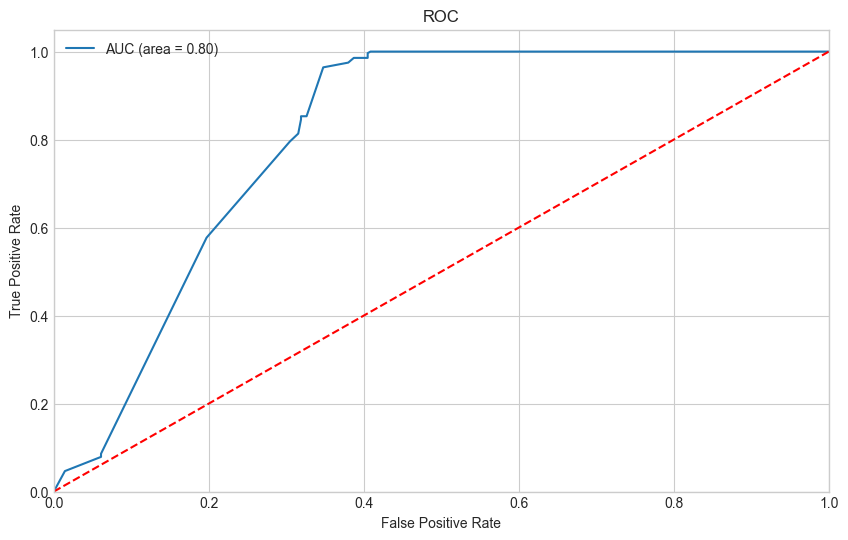

In [356]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y, model.predict(X_tr))

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X_tr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC')
plt.show()

### Feature Importance

In [357]:
model.feature_importances_

array([0.5 , 0.15, 0.3 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [358]:
model.feature_importances_.argmax()

0

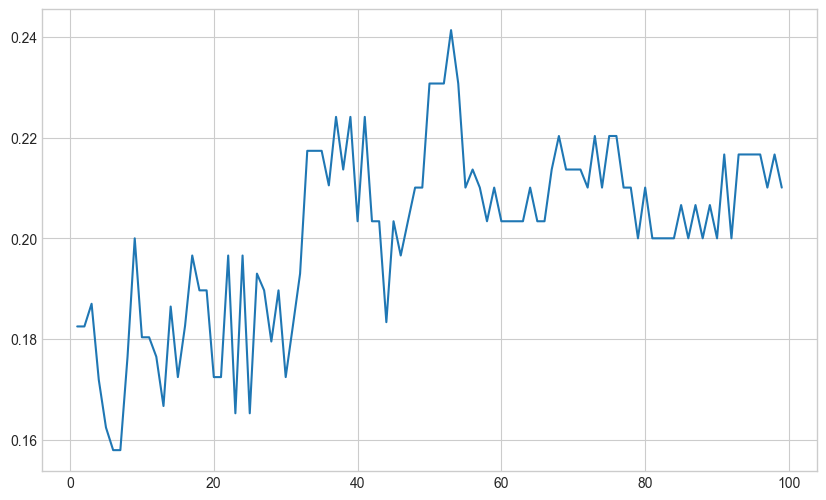

In [360]:
error_rates = []
for n in range(1, 100):
    
    model = AdaBoostClassifier(n_estimators= n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test, preds)
    
    error_rates.append(err)
    
plt.plot(range(1, 100), error_rates)
plt.show()

In [361]:
model.feature_importances_

array([0.06060606, 0.21212121, 0.21212121, 0.19191919, 0.11111111,
       0.09090909, 0.01010101, 0.        , 0.        , 0.02020202,
       0.        , 0.        , 0.        , 0.01010101, 0.01010101,
       0.01010101, 0.        , 0.01010101, 0.        , 0.        ,
       0.02020202, 0.01010101, 0.01010101, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01010101,
       0.        ])

In [362]:
model.feature_importances_.argmax()

1

In [363]:
feats = pd.DataFrame(index= col_transformer.get_feature_names_out(), data= model.feature_importances_, columns= ["Importance"])

imp_feats = feats.sort_values("Importance", ascending = False)
imp_feats

,Importance
minmaxscaler__active_day,0.212121
minmaxscaler__max_value,0.212121
minmaxscaler__transaction_average,0.191919
minmaxscaler__time_spent,0.111111
minmaxscaler__first_deposit_amount,0.090909
minmaxscaler__min_value,0.060606
onehotencoder__investment_experience_extensive_investment_exp,0.020202
onehotencoder__instrument_type_first_traded_adr,0.020202
onehotencoder__liquidity_needs_somewhat_important_liq_need,0.010101
onehotencoder__time_horizon_med_time_horizon,0.010101


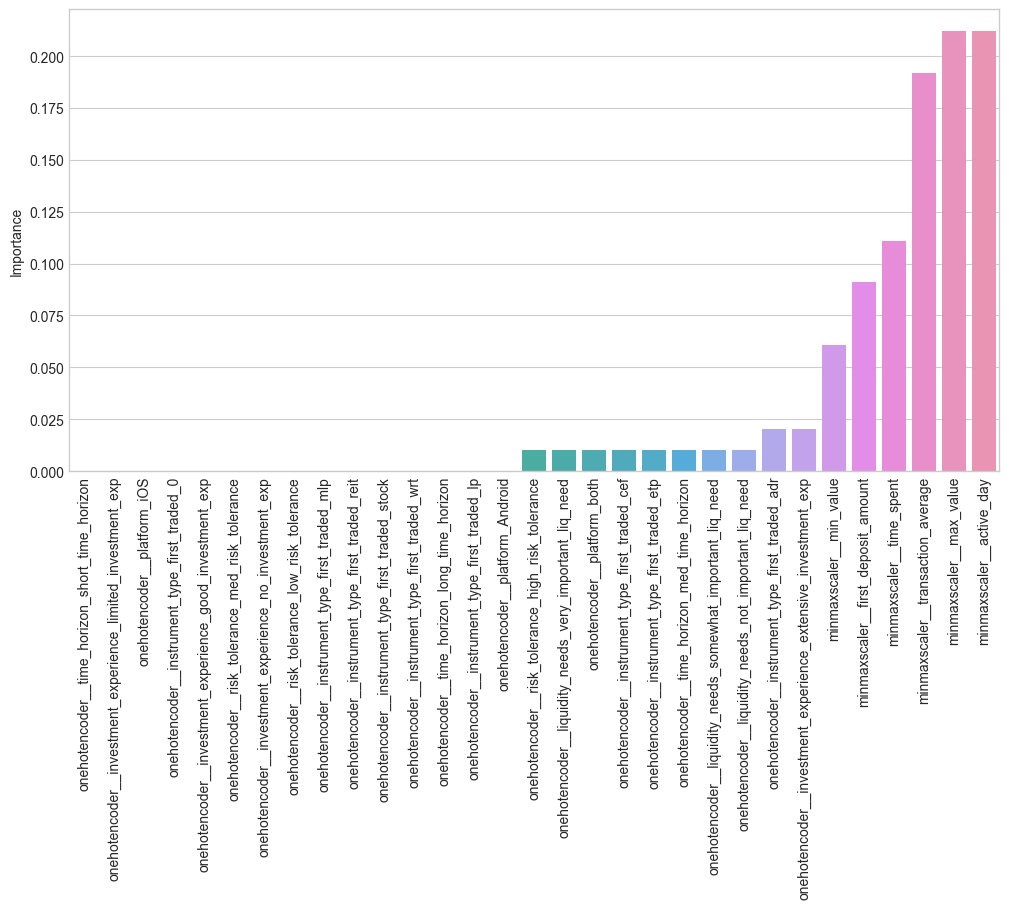

In [364]:
plt.figure(figsize= (12, 6))
sns.barplot(data= imp_feats.sort_values("Importance"), x= imp_feats.sort_values("Importance").index, y= "Importance")
plt.xticks(rotation= 90) 
plt.show()


Text(0.5, 0, 'Feature Importance Levels')

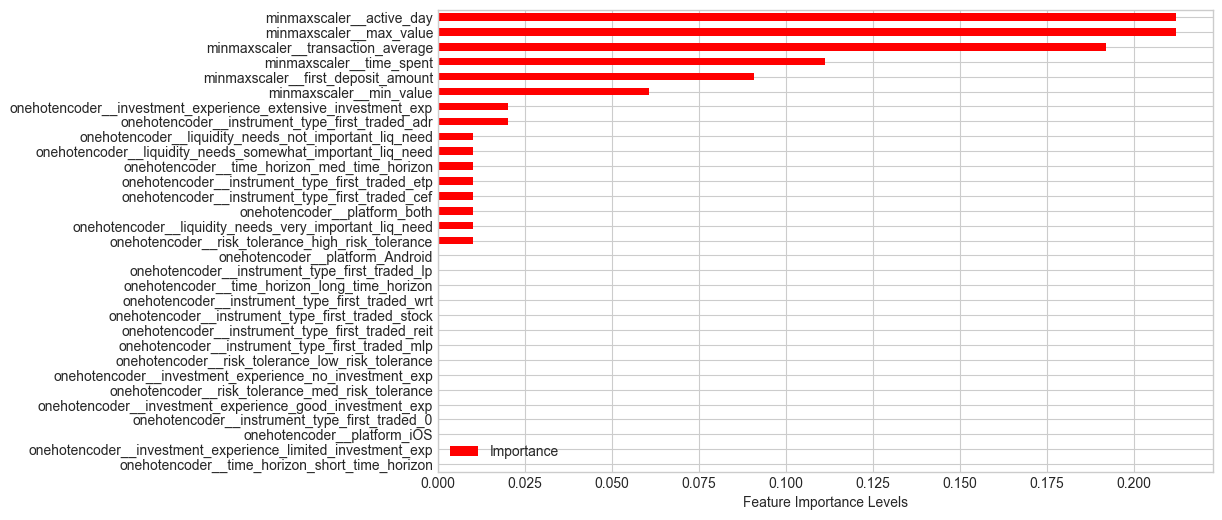

In [365]:
imp_feats.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Feature Importance Levels")

## Gradient Boosting

### Model Fitting 

In [366]:
from sklearn.ensemble import GradientBoostingClassifier

In [367]:
model = GradientBoostingClassifier(random_state= 42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [368]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [369]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.0434131 , 0.9565869 ],
       [0.08183415, 0.91816585],
       [0.07233318, 0.92766682],
       [0.09456323, 0.90543677],
       [0.07342292, 0.92657708],
       [0.24869949, 0.75130051],
       [0.1789943 , 0.8210057 ],
       [0.03115224, 0.96884776],
       [0.27512635, 0.72487365],
       [0.89832761, 0.10167239],
       [0.03498428, 0.96501572],
       [0.99612456, 0.00387544],
       [0.04663516, 0.95336484],
       [0.79111765, 0.20888235],
       [0.77114706, 0.22885294],
       [0.9211456 , 0.0788544 ],
       [0.03534579, 0.96465421],
       [0.98363062, 0.01636938],
       [0.09978429, 0.90021571],
       [0.02824084, 0.97175916],
       [0.05948483, 0.94051517],
       [0.02065804, 0.97934196],
       [0.66712052, 0.33287948],
       [0.82686062, 0.17313938],
       [0.30985528, 0.69014472],
       [0.36441835, 0.63558165],
       [0.92591496, 0.07408504],
       [0.24286275, 0.75713725],
       [0.50662713, 0.49337287],
       [0.9905918 , 0.0094082 ],
       [0.

In [370]:
pd.DataFrame(y_pred_proba).sample(10)

,0,1
99,0.343742,0.656258
69,0.108585,0.891415
109,0.019087,0.980913
16,0.035346,0.964654
1,0.081834,0.918166
8,0.275126,0.724874
0,0.043413,0.956587
9,0.898328,0.101672
85,0.422804,0.577196
82,0.556888,0.443112


In [371]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Pred_proba": y_pred_proba[:,1]}

pd.DataFrame.from_dict(my_dict).sample(20)

,Actual,Pred,Pred_proba
250,0,0,0.008623
219,0,1,0.512611
441,1,1,0.900216
169,0,0,0.009660
553,1,1,0.905437
8,0,0,0.014790
207,0,0,0.019005
72,0,0,0.010007
249,0,0,0.014689
499,1,1,0.760382


In [372]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        56
           1       0.80      0.84      0.82        56

    accuracy                           0.81       112
   macro avg       0.81      0.81      0.81       112
weighted avg       0.81      0.81      0.81       112



### Grid Search

In [374]:
%%time 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = GradientBoostingClassifier(random_state= 42)

param_grid = {"n_estimators": [100, 200, 300, 500], "max_depth": [3,4,5,6], "learning_rate": [0.001, 0.01, 0.1],
              "subsample": [0.5, 1], "max_features" : [None, 2, 3, 4]}

gb_grid_model = RandomizedSearchCV(model, param_grid, scoring= "f1", cv= 10, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: total: 797 ms
Wall time: 39.9 s


In [375]:
%%time 

gb_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: total: 1.53 s
Wall time: 28.3 s


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [None, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.5, 1]},
                   scoring='f1', verbose=2)

In [377]:
print ('The Best score:', gb_grid_model.best_score_)
print("The Best Paremeters: " + str(gb_grid_model.best_params_))

gb_grid_model.best_estimator_

The Best score: 0.8461985016704638
The Best Paremeters: {'subsample': 0.5, 'n_estimators': 200, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.001}


GradientBoostingClassifier(learning_rate=0.001, max_depth=5, n_estimators=200,
                           random_state=42, subsample=0.5)

### Final Model

In [378]:
model = gb_grid_model.best_estimator_
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=5, n_estimators=200,
                           random_state=42, subsample=0.5)

In [379]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [380]:
gb_accuracy = accuracy_score(y_test, y_pred)
gb_f1 = f1_score(y_test, y_pred)
gbrecall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42 14]
 [ 5 51]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.82        56
           1       0.78      0.91      0.84        56

    accuracy                           0.83       112
   macro avg       0.84      0.83      0.83       112
weighted avg       0.84      0.83      0.83       112



### Cross Validate

In [382]:
# model = AdaBoostClassifier(n_estimators= 12, learning_rate= 0.5, random_state= 42)
model = gb_grid_model.best_estimator_

scores = cross_validate(model, X_train, y_train, scoring= ["accuracy", "precision", "recall",
                                                              "f1", "roc_auc"], cv= 10)

df_scores = pd.DataFrame(scores, index= range(1,11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.758068,0.010001,0.800000,0.750000,0.913043,0.823529,0.877470
2,0.848063,0.015006,0.822222,0.758621,0.956522,0.846154,0.897233
3,0.691175,0.010000,0.955556,0.920000,1.000000,0.958333,0.922925
4,0.626064,0.007999,0.688889,0.633333,0.863636,0.730769,0.873518
5,0.661049,0.014001,0.800000,0.709677,1.000000,0.830189,0.875494
6,0.623048,0.008007,0.800000,0.740741,0.909091,0.816327,0.859684
7,0.620046,0.008000,0.772727,0.730769,0.863636,0.791667,0.801653
8,0.602050,0.007996,0.931818,0.952381,0.909091,0.930233,0.962810
9,0.605043,0.008002,0.840909,0.800000,0.909091,0.851064,0.962810
10,0.686047,0.008001,0.886364,0.904762,0.863636,0.883721,0.977273


In [383]:
df_scores.mean()[2:]

test_accuracy     0.829848
test_precision    0.790028
test_recall       0.918775
test_f1           0.846199
test_roc_auc      0.901087
dtype: float64

### Error Metrics

In [384]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82        56
           1       0.78      0.91      0.84        56

    accuracy                           0.83       112
   macro avg       0.84      0.83      0.83       112
weighted avg       0.84      0.83      0.83       112



[[42 14]
 [ 5 51]]


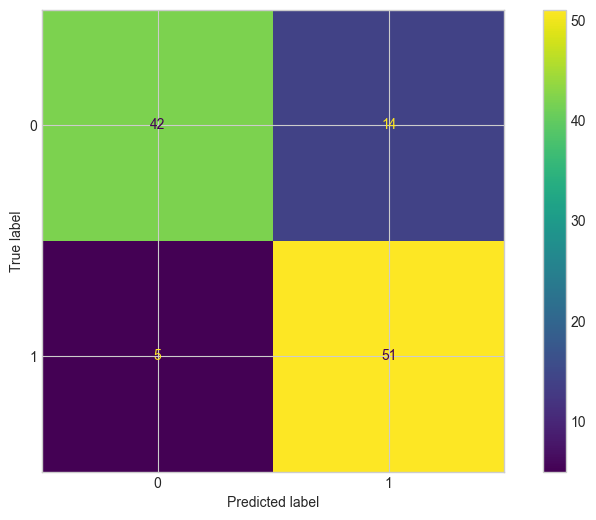

In [385]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                    display_labels=model.classes_).plot()

In [386]:
gb_scores = {
    "gb_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred)
        }, 

    "gb_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred)
        }
               }

gb = round(pd.DataFrame(gb_scores),2)
gb

,gb_train,gb_test
accuracy,0.93,0.83
f1_score,0.93,0.84
precision,0.89,0.78
recall,0.98,0.91


### Evaluating ROC Curves and AUC

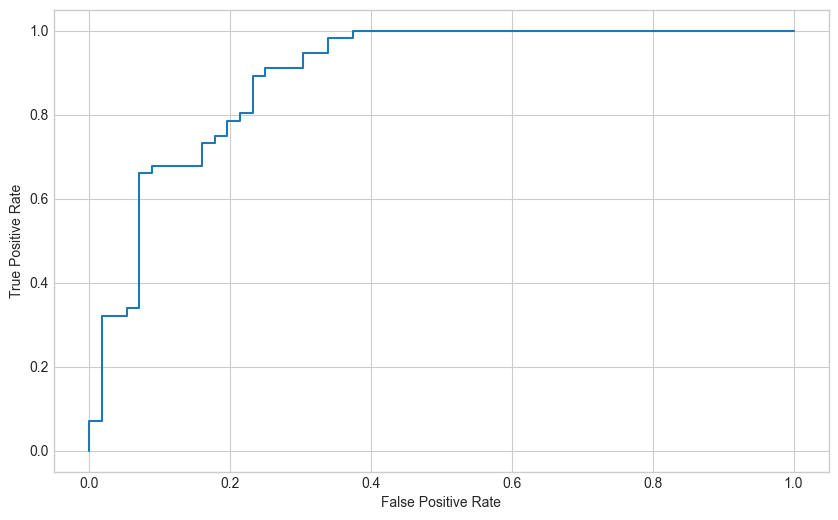

In [387]:
# roc_curve(ada_grid_model, X_test, y_test);

y_score = model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

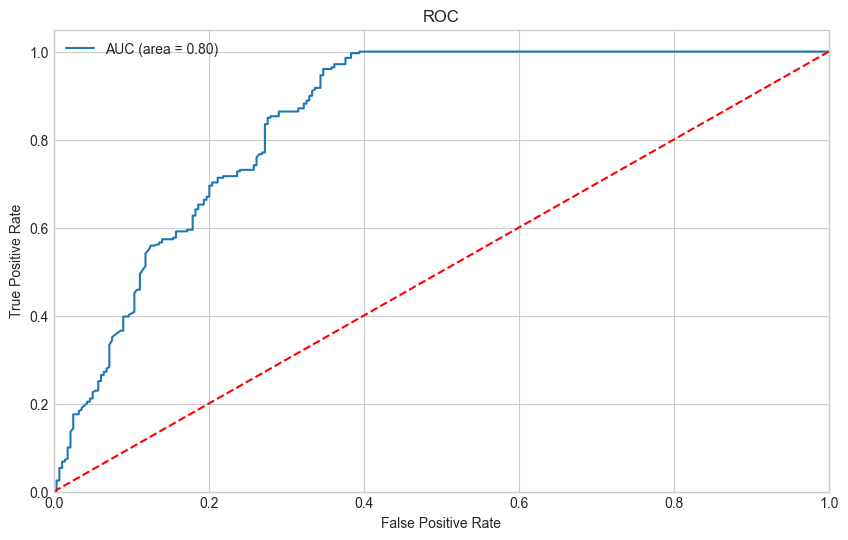

In [390]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y, model.predict(X_tr))

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X_tr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC')
plt.show()

### Feature Importance

In [391]:
model.feature_importances_

array([1.54415323e-01, 7.19714512e-02, 6.05343300e-01, 4.09507724e-02,
       3.25741131e-02, 2.33620950e-02, 2.09081007e-03, 2.05698127e-03,
       9.02879313e-04, 2.93070388e-03, 1.69057928e-03, 1.17213392e-03,
       2.51691338e-03, 3.91857321e-04, 9.97936708e-03, 1.19929438e-02,
       2.74916864e-03, 5.53018942e-03, 2.25487741e-03, 9.75342091e-05,
       1.13945897e-03, 1.72258897e-03, 1.09203562e-03, 0.00000000e+00,
       3.08807652e-03, 0.00000000e+00, 1.20418733e-03, 2.45606563e-04,
       5.18978590e-03, 5.05970034e-03, 6.28456617e-03])

In [392]:
model.feature_importances_.argmax()

2

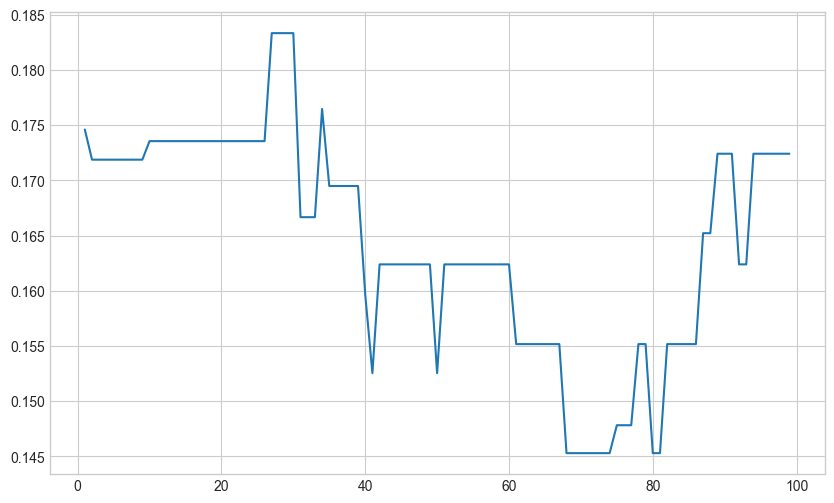

In [393]:
error_rates = []
for n in range(1, 100):
    
    model = GradientBoostingClassifier(n_estimators= n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test, preds)
    
    error_rates.append(err)
    
plt.plot(range(1, 100), error_rates)
plt.show()

In [394]:
model.feature_importances_

array([1.38644685e-01, 9.72347574e-02, 5.79662744e-01, 5.89085897e-02,
       3.28599798e-02, 9.78097416e-03, 1.31265405e-03, 2.71182637e-03,
       1.04623764e-03, 8.55228228e-03, 3.64961504e-03, 1.55559539e-04,
       7.44640642e-07, 2.77630412e-04, 1.06027372e-02, 2.78816629e-02,
       1.66446027e-03, 2.62555641e-04, 4.81377348e-03, 0.00000000e+00,
       5.92628308e-04, 1.18358231e-03, 7.71181057e-04, 0.00000000e+00,
       2.97892696e-03, 0.00000000e+00, 1.64048922e-03, 0.00000000e+00,
       9.43699101e-03, 1.46851681e-03, 1.90421483e-03])

In [395]:
model.feature_importances_.argmax()

2

In [396]:
feats = pd.DataFrame(index= col_transformer.get_feature_names_out(), data= model.feature_importances_, columns= ["Importance"])

imp_feats = feats.sort_values("Importance", ascending = False)
imp_feats

,Importance
minmaxscaler__active_day,5.796627e-01
minmaxscaler__min_value,1.386447e-01
minmaxscaler__max_value,9.723476e-02
minmaxscaler__transaction_average,5.890859e-02
minmaxscaler__time_spent,3.285998e-02
onehotencoder__liquidity_needs_very_important_liq_need,2.788166e-02
onehotencoder__liquidity_needs_somewhat_important_liq_need,1.060274e-02
minmaxscaler__first_deposit_amount,9.780974e-03
onehotencoder__time_horizon_long_time_horizon,9.436991e-03
onehotencoder__investment_experience_extensive_investment_exp,8.552282e-03


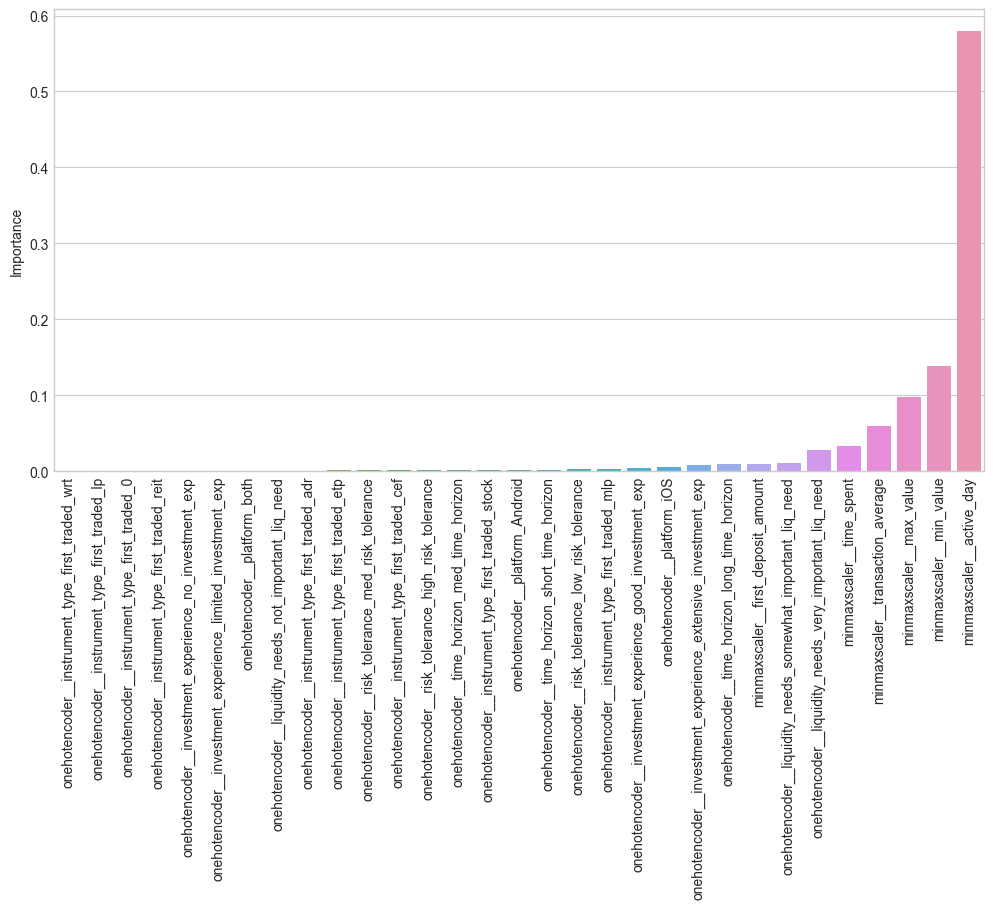

In [397]:
plt.figure(figsize= (12, 6))
sns.barplot(data= imp_feats.sort_values("Importance"), x= imp_feats.sort_values("Importance").index, y= "Importance")
plt.xticks(rotation= 90) 
plt.show()


Text(0.5, 0, 'Feature Importance Levels')

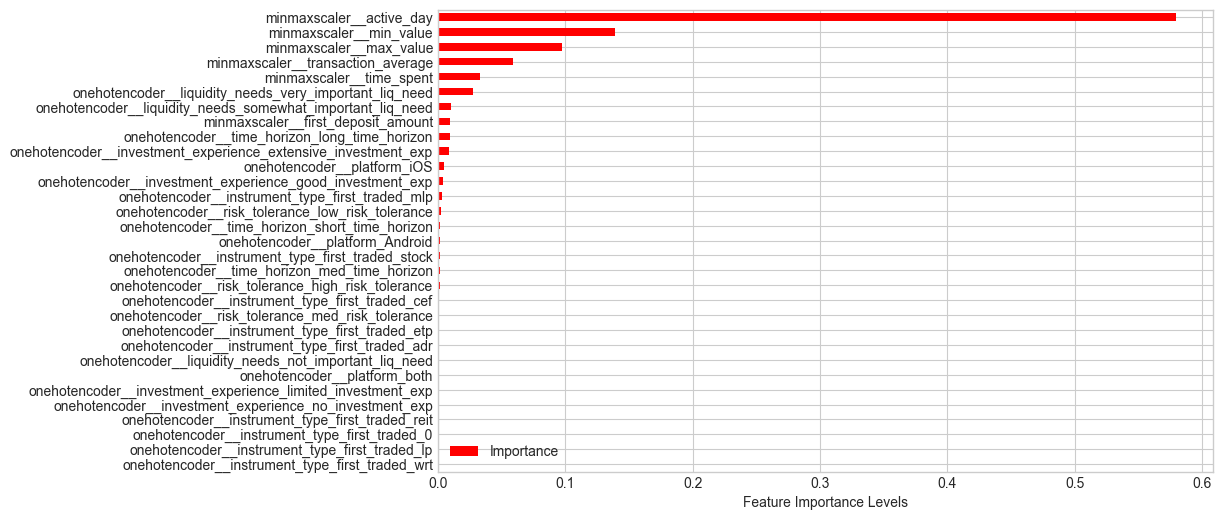

In [398]:
imp_feats.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Feature Importance Levels")

## XG Boosting and Model Performance

In [132]:
#!pip install xgboost

In [399]:
from xgboost import XGBClassifier

In [400]:
xgb = XGBClassifier(random_state= 42).fit(X_train, y_train)

In [401]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [402]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44 12]
 [ 8 48]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        56
           1       0.80      0.86      0.83        56

    accuracy                           0.82       112
   macro avg       0.82      0.82      0.82       112
weighted avg       0.82      0.82      0.82       112



### Grid Search

In [420]:
param_grid = {"n_estimators": [50, 100, 300, 500, 1000], "max_depth": [3, 5, 6], "learning_rate": [0.01, 0.1],
             "subsample": [0.5, 1], "colsample_bytree": [0.5, 1]}

In [421]:
xgb_model = XGBClassifier(random_state= 42)

In [422]:
%%time

xgb_grid = RandomizedSearchCV(xgb_model, param_grid, scoring = "f1", cv = 10, verbose= 2, n_jobs= -1).fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: total: 953 ms
Wall time: 8.86 s


In [423]:
print(xgb_grid.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


In [424]:
y_pred = xgb_grid.predict(X_test)
y_train_pred = xgb_grid.predict(X_train)

In [425]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44 12]
 [ 7 49]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        56
           1       0.80      0.88      0.84        56

    accuracy                           0.83       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.83      0.83      0.83       112



### Cross Validate

In [426]:
# model = XGBClassifier(n_estimator= 300, random_state= 42, subsample = 0.5, learning_rate= 0.1, colsample_bytree= 0.5,
#             max_depth= 3)
model = xgb_grid.best_estimator_
scores = cross_validate(model, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv= 10)

df_scores= pd.DataFrame(scores, index= range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.067005,0.014001,0.822222,0.800000,0.869565,0.833333,0.901186
2,0.053000,0.014003,0.800000,0.769231,0.869565,0.816327,0.893281
3,0.057002,0.016003,0.933333,0.884615,1.000000,0.938776,0.928854
4,0.059006,0.015001,0.822222,0.791667,0.863636,0.826087,0.879447
5,0.048005,0.011998,0.844444,0.758621,1.000000,0.862745,0.889328
6,0.041003,0.013002,0.822222,0.769231,0.909091,0.833333,0.881423
7,0.052004,0.011002,0.772727,0.750000,0.818182,0.782609,0.805785
8,0.041001,0.012002,0.909091,0.950000,0.863636,0.904762,0.958678
9,0.057004,0.015002,0.840909,0.826087,0.863636,0.844444,0.942149
10,0.059005,0.015002,0.886364,0.904762,0.863636,0.883721,0.973140


In [427]:
df_scores.mean()[2:]

test_accuracy     0.845354
test_precision    0.820421
test_recall       0.892095
test_f1           0.852614
test_roc_auc      0.905327
dtype: float64

## Random Forest

In [428]:
from sklearn.ensemble import RandomForestClassifier

In [429]:
rf_model = RandomForestClassifier(random_state= 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44 12]
 [ 6 50]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        56
           1       0.81      0.89      0.85        56

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



### Grid Search

In [449]:
param_grid = {
    'n_estimators': [100, 200, 500,1000],
    'max_depth' : [2,3,4,5,6,7,8],
   }

In [450]:
rf_model = XGBClassifier(random_state= 42)

In [451]:
%%time

rf_grid = RandomizedSearchCV(rf_model, param_grid, scoring = "f1", cv = 10, verbose= 2, n_jobs= -1).fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: total: 1.58 s
Wall time: 14.1 s


In [452]:
print("")
print ('The Best score:', rf_grid.best_score_)
print("The Best Paremeters: " + str(rf_grid.best_params_))


The Best score: 0.8343504266901529
The Best Paremeters: {'n_estimators': 200, 'max_depth': 4}


In [453]:
y_pred = rf_grid.predict(X_test)
y_train_pred = rf_grid.predict(X_train)

In [454]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44 12]
 [10 46]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        56
           1       0.79      0.82      0.81        56

    accuracy                           0.80       112
   macro avg       0.80      0.80      0.80       112
weighted avg       0.80      0.80      0.80       112



### Cross Validate

In [455]:
# model = XGBClassifier(n_estimator= 300, random_state= 42, subsample = 0.5, learning_rate= 0.1, colsample_bytree= 0.5,
#             max_depth= 3)
model = rf_grid.best_estimator_
scores = cross_validate(model, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv= 10)

df_scores= pd.DataFrame(scores, index= range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.208017,0.015999,0.844444,0.833333,0.869565,0.851064,0.920949
2,0.154011,0.015003,0.777778,0.782609,0.782609,0.782609,0.877470
3,0.140011,0.013003,0.844444,0.863636,0.826087,0.844444,0.909091
4,0.121008,0.011003,0.777778,0.772727,0.772727,0.772727,0.873518
5,0.142010,0.013001,0.866667,0.807692,0.954545,0.875000,0.928854
6,0.125011,0.011999,0.844444,0.800000,0.909091,0.851064,0.879447
7,0.221017,0.017003,0.772727,0.772727,0.772727,0.772727,0.789256
8,0.282020,0.012000,0.818182,0.888889,0.727273,0.800000,0.944215
9,0.139008,0.014000,0.863636,0.863636,0.863636,0.863636,0.958678
10,0.148012,0.014003,0.931818,0.952381,0.909091,0.930233,0.985537


In [456]:
df_scores.mean()[2:]

test_accuracy     0.834192
test_precision    0.833763
test_recall       0.838735
test_f1           0.834350
test_roc_auc      0.906701
dtype: float64

In [457]:
rf_grid_scores = {
    "rf_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred)}, 

    "rf_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred)}
               }

rf_grid =pd.DataFrame(rf_grid_scores)
rf_grid
   

,rf_grid_train,rf_grid_test
accuracy,1.0,0.803571
precision,1.0,0.793103
recall,1.0,0.821429
f1_score,1.0,0.807018


## Decision Tree

In [466]:
from sklearn.tree import DecisionTreeClassifier

In [467]:
dt_model = DecisionTreeClassifier(random_state= 42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46 10]
 [15 41]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79        56
           1       0.80      0.73      0.77        56

    accuracy                           0.78       112
   macro avg       0.78      0.78      0.78       112
weighted avg       0.78      0.78      0.78       112



In [469]:
dt_scores = {
    "dt_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred)
        }, 

    "dt_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred)
        }
               }

dt = round(pd.DataFrame(dt_scores),2)
dt

,dt_train,dt_test
accuracy,1.0,0.78
f1_score,1.0,0.77
precision,1.0,0.80
recall,1.0,0.73


## Logistic Regression

In [480]:
from sklearn.linear_model import LogisticRegression

In [481]:
log_model = LogisticRegression(random_state= 42)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43 13]
 [17 39]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        56
           1       0.75      0.70      0.72        56

    accuracy                           0.73       112
   macro avg       0.73      0.73      0.73       112
weighted avg       0.73      0.73      0.73       112



In [482]:
log_scores = {
    "log_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred)
        }, 

    "log_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred)
        }
               }

log = round(pd.DataFrame(log_scores),2)
log

,log_train,log_test
accuracy,1.0,0.73
f1_score,1.0,0.72
precision,1.0,0.75
recall,1.0,0.70


## KNN

In [474]:
from sklearn.neighbors import KNeighborsClassifier

In [475]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40 16]
 [14 42]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        56
           1       0.72      0.75      0.74        56

    accuracy                           0.73       112
   macro avg       0.73      0.73      0.73       112
weighted avg       0.73      0.73      0.73       112



In [476]:
knn_scores = {
    "lr_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred)
        }, 

    "knn_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred)
        }
               }

knn = round(pd.DataFrame(knn_scores),2)
knn

,lr_train,knn_test
accuracy,1.0,0.73
f1_score,1.0,0.74
precision,1.0,0.72
recall,1.0,0.75


## SVM

In [477]:
from sklearn.svm import SVC

In [478]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43 13]
 [16 40]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        56
           1       0.75      0.71      0.73        56

    accuracy                           0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.74      0.74      0.74       112



In [479]:
svc_scores = {
    "svc_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred)
        }, 

    "svc_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred)
        }
               }

svc = round(pd.DataFrame(svc_scores),2)
svc

,svc_train,svc_test
accuracy,1.0,0.74
f1_score,1.0,0.73
precision,1.0,0.75
recall,1.0,0.71


## Comparing Models

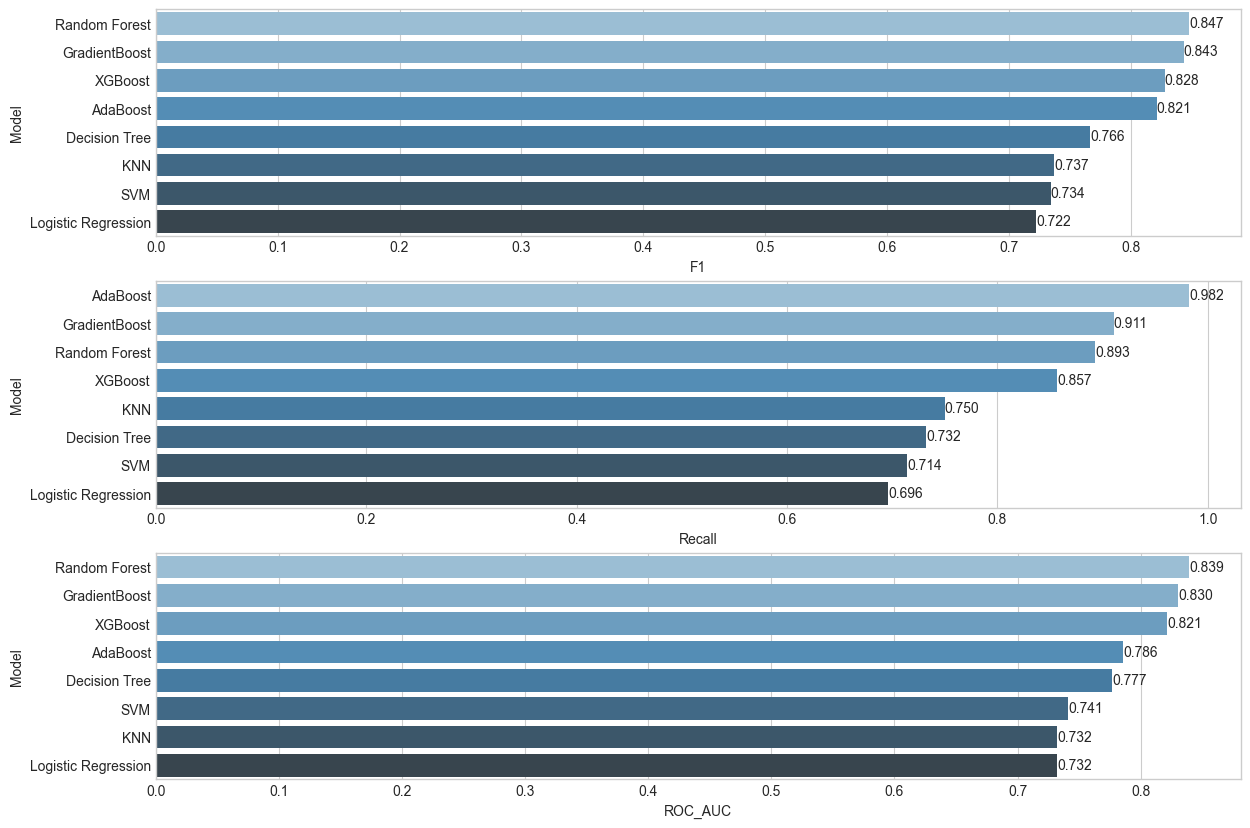

In [484]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gbrecall, xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

** F1 scoru olarak en yüksek sonucu(0.85) Random Forest Modeli verdiğinden optimum model RandomForestClassifier olarak seçebiliriz.
** Since Random Forest Model gives the highest result (0.85) as F1 score, we can choose RandomForestClassifier as the optimum model.